## Data Explanation

Targets:
- h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
- seasonal_vaccine - Whether respondent received seasonal flu vaccine.

Predictors:
- h1n1_concern - Level of concern about the H1N1 flu.
        0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
- h1n1_knowledge - Level of knowledge about H1N1 flu.
        0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
- behavioral_antiviral_meds - Has taken antiviral medications. (binary)
- behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
- behavioral_face_mask - Has bought a face mask. (binary)
- behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
- behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
- behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
- behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
- doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
- doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
- chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
- child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
- health_worker - Is a healthcare worker. (binary)
- health_insurance - Has health insurance. (binary)
- opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
        1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
        1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
        1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
        1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
        1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
        1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- age_group - Age group of respondent. 
- education - Self-reported education level.
- race - Race of respondent.
- sex - Sex of respondent.
- income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
- marital_status - Marital status of respondent.
- rent_or_own - Housing situation of respondent.
- employment_status - Employment status of respondent.
- hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
- census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
- household_adults - Number of other adults in household, top-coded to 3.
- household_children - Number of children in household, top-coded to 3.
- employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
- employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.


## Import Resources

In [1]:
import numpy as np
import pandas as pd
import xlrd
import os
import seaborn as sns
import xgboost
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,\
ExtraTreesClassifier, VotingClassifier, StackingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
df_features = pd.read_csv('Data/training_set_features.csv')
df_targets = pd.read_csv('Data/training_set_labels.csv')

In [3]:
df = df_features.merge(df_targets)

In [4]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [5]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [6]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [8]:
for c in df.columns:
    print("---- %s ---" % c)
    print(df[c].value_counts())

---- respondent_id ---
2047     1
7657     1
3371     1
13612    1
15661    1
        ..
12979    1
2740     1
693      1
6838     1
0        1
Name: respondent_id, Length: 26707, dtype: int64
---- h1n1_concern ---
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64
---- h1n1_knowledge ---
1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64
---- behavioral_antiviral_meds ---
0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64
---- behavioral_avoidance ---
1.0    19228
0.0     7271
Name: behavioral_avoidance, dtype: int64
---- behavioral_face_mask ---
0.0    24847
1.0     1841
Name: behavioral_face_mask, dtype: int64
---- behavioral_wash_hands ---
1.0    22015
0.0     4650
Name: behavioral_wash_hands, dtype: int64
---- behavioral_large_gatherings ---
0.0    17073
1.0     9547
Name: behavioral_large_gatherings, dtype: int64
---- behavioral_outside_home ---
0.0    17644
1.0     8981
Name: behavioral_outside_home, d

In [9]:
df.corr()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,1.000000,0.017839,0.003425,-0.008475,0.009638,-0.006644,0.011105,0.004539,0.009011,0.007575,...,0.005912,0.000958,-0.002270,0.005935,-0.005291,0.009563,0.000187,-0.003726,-0.003280,-0.004652
h1n1_concern,0.017839,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,...,0.239604,0.377033,0.360070,0.235136,0.333990,0.225731,-0.015658,0.050525,0.121929,0.154828
h1n1_knowledge,0.003425,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,...,0.121009,0.073086,-0.019501,0.086103,0.076825,-0.062483,0.024874,0.050583,0.117951,0.120152
behavioral_antiviral_meds,-0.008475,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,...,0.030211,0.105163,0.079091,0.015003,0.085315,0.084305,0.044900,0.084822,0.040608,0.006277
behavioral_avoidance,0.009638,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,...,0.112300,0.117851,0.131405,0.119554,0.129504,0.082942,0.019122,0.040328,0.047690,0.076395
behavioral_face_mask,-0.006644,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,...,0.037651,0.131165,0.107129,0.041556,0.110161,0.090009,0.013991,0.005826,0.070498,0.050083
behavioral_wash_hands,0.011105,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,...,0.136987,0.168711,0.150024,0.138517,0.172464,0.088029,0.009669,0.047764,0.074712,0.112414
behavioral_large_gatherings,0.004539,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,...,0.052299,0.126463,0.185924,0.078491,0.132865,0.135446,-0.031938,-0.009449,0.017822,0.064025
behavioral_outside_home,0.009011,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,...,0.050748,0.125549,0.174834,0.067469,0.120237,0.138133,-0.027527,-0.009558,0.021768,0.053509
behavioral_touch_face,0.007575,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,...,0.104126,0.146080,0.131772,0.105798,0.143735,0.090097,-0.000553,0.023606,0.071648,0.120228


In [10]:
corrs = df.corr().unstack().sort_values().drop_duplicates()
corrs

household_children           seasonal_vaccine              -0.114614
                             chronic_med_condition         -0.108237
health_insurance             household_adults              -0.078697
household_children           opinion_seas_vacc_effective   -0.076503
household_adults             chronic_med_condition         -0.071346
                                                              ...   
opinion_h1n1_sick_from_vacc  opinion_seas_sick_from_vacc    0.491546
opinion_h1n1_risk            opinion_seas_risk              0.564208
behavioral_large_gatherings  behavioral_outside_home        0.584085
doctor_recc_seasonal         doctor_recc_h1n1               0.591868
respondent_id                respondent_id                  1.000000
Length: 326, dtype: float64

In [11]:
df['age_group'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

<AxesSubplot:>

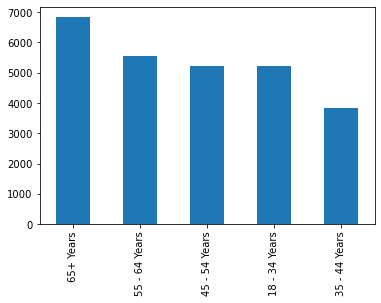

In [12]:
df['age_group'].value_counts().plot(kind = 'bar')

## Preprocessing

In [13]:
df.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [4]:
# Missing or irrelevant data
drop = ['respondent_id', 'doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
                'opinion_seas_sick_from_vacc', 'seasonal_vaccine', 'employment_industry', 'employment_occupation']

# Impute with most frequent
most_frequent = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 
                'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 
                'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
                'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective',
                'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'income_poverty', 'marital_status',
                'rent_or_own', 'employment_status', 'household_adults', 'household_children', 'education']

# Encoding and scaling
cat_cols = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa']

num_cols = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 
                'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 
                'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
                'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective',
                'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
                'household_adults', 'household_children']

In [5]:
df = df.drop(drop, axis=1)

In [6]:
X = df.drop('h1n1_vaccine', axis=1)
y = df['h1n1_vaccine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train = X_train.fillna(df.mode().iloc[0])
X_test = X_test.fillna(df.mode().iloc[0])

In [8]:
ct = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(drop='first'), cat_cols),
    ('scaler', MinMaxScaler(), num_cols)
], remainder='passthrough')

In [9]:
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)

In [10]:
ohe_col_names = ct.named_transformers_['ohe'].get_feature_names(input_features = cat_cols)

In [11]:
X_train_trans = pd.DataFrame(X_train_trans,
             columns = [*ohe_col_names, *num_cols], # Using * to unpack lists
             index = X_train.index)

X_test_trans = pd.DataFrame(X_test_trans,
             columns = [*ohe_col_names, *num_cols], # Using * to unpack lists
             index = X_test.index)

In [16]:
X_train_trans.describe()

,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,...,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children
count,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.00000,21365.000000,21365.000000,21365.000000,...,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000
mean,0.142944,0.195834,0.208799,0.255277,0.087760,0.430049,0.26520,0.066136,0.061877,0.794477,...,0.203651,0.274561,0.079616,0.110414,0.935081,0.712790,0.335174,0.338942,0.296653,0.176940
std,0.350024,0.396851,0.406460,0.436027,0.282953,0.495094,0.44145,0.248526,0.240937,0.404093,...,0.402722,0.446303,0.270704,0.313413,0.246389,0.250402,0.319782,0.338335,0.250323,0.308851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.750000,0.250000,0.250000,0.333333,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.750000,0.750000,0.333333,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
X_train_trans.columns

Index(['age_group_35 - 44 Years', 'age_group_45 - 54 Years',
       'age_group_55 - 64 Years', 'age_group_65+ Years',
       'education_< 12 Years', 'education_College Graduate',
       'education_Some College', 'race_Hispanic', 'race_Other or Multiple',
       'race_White', 'sex_Male', 'income_poverty_> $75,000',
       'income_poverty_Below Poverty', 'marital_status_Not Married',
       'rent_or_own_Rent', 'employment_status_Not in Labor Force',
       'employment_status_Unemployed', 'hhs_geo_region_bhuqouqj',
       'hhs_geo_region_dqpwygqj', 'hhs_geo_region_fpwskwrf',
       'hhs_geo_region_kbazzjca', 'hhs_geo_region_lrircsnp',
       'hhs_geo_region_lzgpxyit', 'hhs_geo_region_mlyzmhmf',
       'hhs_geo_region_oxchjgsf', 'hhs_geo_region_qufhixun',
       'census_msa_MSA, Principle City', 'census_msa_Non-MSA', 'h1n1_concern',
       'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_

In [12]:
demogs = ['age_group_35 - 44 Years', 'age_group_45 - 54 Years',
       'age_group_55 - 64 Years', 'age_group_65+ Years',
       'education_< 12 Years', 'education_College Graduate',
       'education_Some College', 'race_Hispanic', 'race_Other or Multiple',
       'race_White', 'sex_Male', 'income_poverty_> $75,000',
       'income_poverty_Below Poverty', 'marital_status_Not Married',
       'rent_or_own_Rent', 'employment_status_Not in Labor Force',
       'employment_status_Unemployed', 'hhs_geo_region_bhuqouqj',
       'hhs_geo_region_dqpwygqj', 'hhs_geo_region_fpwskwrf',
       'hhs_geo_region_kbazzjca', 'hhs_geo_region_lrircsnp',
       'hhs_geo_region_lzgpxyit', 'hhs_geo_region_mlyzmhmf',
       'hhs_geo_region_oxchjgsf', 'hhs_geo_region_qufhixun',
       'census_msa_MSA, Principle City', 'census_msa_Non-MSA',
        'household_adults', 'household_children']

In [13]:
X_train_demogs = X_train_trans[demogs]
X_test_demogs = X_test_trans[demogs]

In [14]:
demotreepipe = Pipeline([
    ('tree', DecisionTreeClassifier())
])

# Note you use the part of the pipeline's name `NAME__{parameter}`
parameters = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__max_depth': list(range(10)[1:]),
    'tree__min_samples_leaf': list(range(10))[1:],
    'tree__random_state': [42]
}


cv_demo_tree = GridSearchCV(demotreepipe, param_grid=parameters, scoring='precision')

cv_demo_tree.fit(X_train_demogs, y_train)
y_pred_demo_tree = cv_demo_tree.predict(X_test_demogs)
print(y_pred_demo_forest)

C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn

C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn

C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn

C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn

C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn

C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn

C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn

C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn

C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn

C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn

C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn

C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn

C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn

C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn

NameError: name 'y_pred_demo_forest' is not defined

In [15]:
(unique, counts) = np.unique(y_pred_demo_tree, return_counts=True)

frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[   0 5322]
 [   1   20]]


In [16]:
cv_demo_tree.best_params_

{'tree__criterion': 'entropy',
 'tree__max_depth': 7,
 'tree__min_samples_leaf': 9,
 'tree__random_state': 42}

In [17]:
cv_demo_tree.best_score_

0.31252846704499093

In [46]:
demo_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=9, random_state=42)
demo_tree.fit(X_train_demogs, y_train)
# y_pred_demo_tree = cv_demo_tree.predict(X_test_demogs)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=9,
                       random_state=42)

In [47]:
important_features_demo = {}
for idx, val in enumerate(demo_tree.feature_importances_):
    important_features_demo[idx] = val

important_features_list = sorted(important_features_demo,
                                 key=important_features_demo.get,
                                 reverse=True)

for x in important_features_list[:5] :
    print(X_train_demogs.columns[x])

income_poverty_> $75,000
household_adults
age_group_65+ Years
sex_Male
hhs_geo_region_lzgpxyit


## Feature Selection

In [41]:
selector = SelectKBest(score_func=f_regression, k=20)
selector.fit(X_train_trans, y_train)

# X_k_best_train = selector.transform(X_train_trans)
# X_k_best_test = selector.transform(X_test_trans)

cols = selector.get_support(indices=True)
X_train_new = X_train_trans.iloc[:,cols]
X_test_new = X_test_trans.iloc[:,cols]

In [42]:
X_train_new

,education_< 12 Years,education_College Graduate,"income_poverty_> $75,000",marital_status_Not Married,hhs_geo_region_bhuqouqj,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc
24706,0.0,0.0,0.0,0.0,0.0,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.00,0.75,0.25
5393,0.0,1.0,1.0,1.0,0.0,0.666667,0.5,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.00,0.75,0.75
20898,0.0,1.0,0.0,0.0,0.0,0.000000,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.25,0.00
3429,0.0,1.0,0.0,1.0,1.0,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.75,0.25,0.00
8731,0.0,1.0,0.0,1.0,0.0,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.25,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.0,0.0,1.0,1.0,0.0,0.666667,0.5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.75,0.25,0.25
5390,0.0,0.0,0.0,1.0,0.0,0.333333,0.5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.75,0.25,0.00
860,0.0,0.0,0.0,0.0,0.0,0.666667,0.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.75,0.25,0.25
15795,0.0,1.0,1.0,0.0,0.0,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.00,0.00,0.75


## Dummy Classifier

In [24]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train_trans, y_train)

dummy_preds = dummy.predict(X_test_trans)

print(accuracy_score(y_test, dummy_preds))
print(precision_score(y_test, dummy_preds))

0.7884687383002621
0.0


C:\Users\Patrick\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
(unique, counts) = np.unique(dummy_preds, return_counts=True)

frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[   0 5342]]


## Decision Tree Gridsearch

In [13]:
treepipe = Pipeline([
    ('tree', DecisionTreeClassifier())
])

# Note you use the part of the pipeline's name `NAME__{parameter}`
parameters = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__max_depth': list(range(10)[1:]),
    'tree__min_samples_leaf': list(range(10))[1:],
    'tree__random_state': [42]
}

cv_tree = GridSearchCV(treepipe, param_grid=parameters, scoring='precision')

cv_tree.fit(X_train_trans, y_train)
y_pred_tree = cv_tree.predict(X_test_trans)
print(y_pred_tree)

[0 0 0 ... 0 0 0]


In [14]:
cv_tree.best_params_

{'tree__criterion': 'gini',
 'tree__max_depth': 2,
 'tree__min_samples_leaf': 1,
 'tree__random_state': 42}

In [15]:
cv_tree.best_score_

0.6885314980379216

In [16]:
accuracy_score(y_test, y_pred_tree)

0.8260950954698615

## Logistic Gridsearch

In [18]:
logpipe = Pipeline([
    ('logistic', LogisticRegression())
])

# Note you use the part of the pipeline's name `NAME__{parameter}`
parameters = {
    'logistic__C': [1, 10, 100, 1000, 10000, 100000],
    'logistic__class_weight': [None, 'balanced'],
    'logistic__random_state': [42]
}

cv_log = GridSearchCV(logpipe, param_grid=parameters, scoring='precision')

cv_log.fit(X_train_trans, y_train)
y_pred_log = cv_log.predict(X_test_trans)
print(y_pred_log)

[0 0 0 ... 1 0 0]


In [52]:
(unique, counts) = np.unique(y_pred_log, return_counts=True)

frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[   0 5051]
 [   1  291]]


In [19]:
cv_log.best_params_

{'logistic__C': 1,
 'logistic__class_weight': None,
 'logistic__random_state': 42}

In [20]:
cv_log.best_score_

0.6812667659379484

## KNN Gridsearch

In [13]:
knnpipe = Pipeline([
    ('KNN', KNeighborsClassifier())
])

# Note you use the part of the pipeline's name `NAME__{parameter}`
parameters = {
    'KNN__n_neighbors': [9, 10, 11, 12, 13, 14, 15]
}

cv_knn = GridSearchCV(knnpipe, param_grid=parameters, scoring='precision')

cv_knn.fit(X_train_trans, y_train)
y_pred_knn = cv_knn.predict(X_test_trans)
print(y_pred_knn)

[0 0 0 ... 0 0 0]


In [14]:
(unique, counts) = np.unique(y_pred_knn, return_counts=True)

frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[   0 5166]
 [   1  176]]


In [15]:
cv_knn.best_params_

{'KNN__n_neighbors': 14}

In [16]:
cv_knn.best_score_

0.6960868654302264

## Forest Gridsearch

In [22]:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

In [66]:
forestpipe = Pipeline([
    ('forest', RandomForestClassifier())
])

# Note you use the part of the pipeline's name `NAME__{parameter}`
parameters = {
    'forest__n_estimators': [50, 55, 60, 65, 70, 75, 80],
    'forest__criterion': ['gini', 'entropy', 'log_loss'],
    'forest__max_depth': list(range(7)[1:]),
    'forest__random_state': [42]
}

cv_forest = GridSearchCV(forestpipe, param_grid=parameters, scoring='precision')

cv_forest.fit(X_train_trans, y_train)
y_pred_forest = cv_forest.predict(X_test_trans)
print(y_pred_forest)

[0 0 0 ... 0 0 0]


In [67]:
(unique, counts) = np.unique(y_pred_forest, return_counts=True)

frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[   0 5321]
 [   1   21]]


In [90]:
cv_forest.best_params_

{'forest__criterion': 'entropy',
 'forest__max_depth': 3,
 'forest__n_estimators': 60,
 'forest__random_state': 42}

In [91]:
cv_forest.best_score_

0.9008547008547009

In [92]:
accuracy_score(y_test, y_pred_forest)

0.7920254586297267

In [74]:
best_forest = RandomForestClassifier(criterion='entropy',
 max_depth=3,
 n_estimators=60,
 random_state=42)

best_forest.fit(X_train_trans, y_train)
y_pred_best_forest = best_forest.predict(X_test_trans)

In [75]:
best_forest.feature_importances_

array([3.73474705e-04, 2.78509258e-04, 4.73096271e-04, 2.65824200e-04,
       3.31623681e-03, 2.29087433e-03, 0.00000000e+00, 1.22401712e-04,
       0.00000000e+00, 1.33171156e-03, 2.99608046e-04, 4.02708145e-03,
       4.68002256e-04, 2.95415116e-03, 1.19050784e-03, 1.51463731e-03,
       5.04761905e-04, 5.34862565e-04, 7.10021177e-05, 0.00000000e+00,
       0.00000000e+00, 4.97128079e-06, 2.42189533e-03, 5.99913093e-04,
       0.00000000e+00, 0.00000000e+00, 2.42492026e-04, 0.00000000e+00,
       1.96411037e-02, 8.12622962e-02, 1.72154311e-03, 3.01524863e-03,
       8.95856123e-03, 2.14531728e-03, 5.15426273e-04, 8.87872937e-05,
       1.35193333e-02, 2.97984486e-01, 2.93274047e-02, 9.97366193e-03,
       9.59452571e-02, 2.34500694e-03, 1.72112636e-01, 2.09683117e-01,
       2.75885603e-02, 2.00598768e-05, 8.66177781e-04])

In [89]:
important_features_dict = {}
for idx, val in enumerate(best_forest.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

for x in important_features_list[:10] :
    print(X_train_trans.columns[x])

doctor_recc_h1n1
opinion_h1n1_risk
opinion_h1n1_vacc_effective
health_worker
h1n1_knowledge
chronic_med_condition
opinion_h1n1_sick_from_vacc
h1n1_concern
behavioral_touch_face
child_under_6_months


## Bagging

In [17]:
bag_tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=4, random_state=42)
bag_log = LogisticRegression(random_state=42)
bag_knn = KNeighborsClassifier(n_neighbors=14)

In [18]:
avg = VotingClassifier(estimators=[
    ('tree', bag_tree),
    ('log', bag_log),
    ('knn', bag_knn)])
avg.fit(X_train_trans, y_train)

VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(max_depth=2,
                                                     min_samples_leaf=4,
                                                     random_state=42)),
                             ('log', LogisticRegression(random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=14))])

In [19]:
scores = cross_val_score(estimator=avg, X=X_train_trans,
               y=y_train, cv=5)
scores

array([0.82167096, 0.82026679, 0.8254154 , 0.82869179, 0.82377721])

In [20]:
avg_preds = avg.predict(X_test_trans)

In [21]:
precision_score(y_test, avg_preds)

0.7522522522522522

## Boost

In [30]:
X_train_trans_boost = X_train_trans.copy()
X_test_boost = X_test_trans.copy()
X_train_trans_boost.rename(columns={"education_< 12 Years": "education_greater_12_years", "income_poverty_> $75,000": "income_poverty_greater_$75000"}, inplace=True)
X_test_boost.rename(columns={"education_< 12 Years": "education_greater_12_years", "income_poverty_> $75,000": "income_poverty_greater_$75000"}, inplace=True)

In [34]:
boost = xgboost.XGBClassifier(random_state=42)

boost.fit(X_train_trans_boost, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
cross_val_score(boost, X_train_trans_boost, y_train, cv=5)

array([0.81886263, 0.82658554, 0.82611748, 0.82564943, 0.8254154 ])

In [36]:
boost_preds = boost.predict(X_test_boost)

In [37]:
precision_score(y_test, boost_preds)

0.6339285714285714

In [44]:
boostpipe = Pipeline([
    ('boost', xgboost.XGBClassifier())
])

# Note you use the part of the pipeline's name `NAME__{parameter}`
parameters = {
    'boost__max_depth': [2, 3, 4, 5, 6, 7],
    'boost__n_estimators': [25, 50, 75, 100, 125, 150],
    'boost__random_state': [42]
}

cv_boost = GridSearchCV(boostpipe, param_grid=parameters, scoring='precision')

cv_boost.fit(X_train_trans_boost, y_train)
y_pred_boost = cv_boost.predict(X_test_boost)
print(y_pred_boost)

[0 0 0 ... 1 0 0]


In [45]:
(unique, counts) = np.unique(y_pred_boost, return_counts=True)

frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[   0 4651]
 [   1  691]]


In [46]:
cv_boost.best_params_

{'boost__max_depth': 3, 'boost__n_estimators': 25, 'boost__random_state': 42}

In [47]:
cv_boost.best_score_

0.6855399145618978